In [1]:
!pwd
!ls


/content
sample_data


In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd ..
%cd /content/drive/MyDrive

Mounted at /content/drive
/
/content/drive/MyDrive


### I have considered 3 datasets :
#### 1.) penguins.csv
#### 2.) epicurious.csv
#### 3.) diamond.csv

# Step -I

In [3]:
# 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
# 2
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/noisy_datasets/penguins.csv')
df.head()


,species,island,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender,year
0,Adelie,Torgersen,6563,11,39.1,18.7,181.0,3750.0,male,2007.0
1,Adelie,Torgersen,4890,14,39.5,17.4,186.0,3800.0,female,2007.0
2,Adelie,Torgersen,7184,11,40.3,18.0,195.0,3250.0,female,2007.0
3,Adelie,Torgersen,4169,8,NaN,NaN,NaN,992.0,NaN,2007.0
4,Adelie,Torgersen,4774,8,36.7,19.3,193.0,3450.0,female,2007.0


In [25]:
df.shape

(344, 10)

In [6]:
df.dtypes

,0
species,object
island,object
calorie requirement,int64
average sleep duration,int64
bill_length_mm,float64
bill_depth_mm,float64
flipper_length_mm,float64
body_mass_g,float64
gender,object
year,float64


The dataset describes about different species of penguins and their habitat. This dataset also conveys the nature of penguins and their body specifications.

In [7]:
# 3
df.describe()

,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,344.000000,344.000000,337.000000,333.000000,336.000000,339.000000,342.000000
mean,5270.002907,10.447674,45.494214,18.018318,197.764881,4175.463127,2008.035088
std,1067.959116,2.265895,10.815787,9.241384,27.764491,858.713267,0.816938
min,3504.000000,7.000000,32.100000,13.100000,10.000000,882.000000,2007.000000
25%,4403.000000,9.000000,39.500000,15.700000,190.000000,3550.000000,2007.000000
50%,5106.500000,10.000000,45.100000,17.300000,197.000000,4050.000000,2008.000000
75%,6212.750000,12.000000,49.000000,18.700000,213.000000,4750.000000,2009.000000
max,7197.000000,14.000000,124.300000,127.260000,231.000000,6300.000000,2009.000000


In [8]:
df.isnull().sum()

,0
species,11
island,10
calorie requirement,0
average sleep duration,0
bill_length_mm,7
bill_depth_mm,11
flipper_length_mm,8
body_mass_g,5
gender,17
year,2


8 columns [species, island, bill_length_mm, bill_dept_mm, flipper_length_mm, body_mass_g, gender, year] have missing values.

In [27]:
# 4
def ImputeKNN(df, k=3):
    df_imputed = df.copy()
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    for feature in numeric_columns:
        missing_rows = df_imputed[df_imputed[feature].isna()].index

        for row_idx in missing_rows:
            target_row = df_imputed.loc[row_idx, numeric_columns]
            candidate_rows = df_imputed[df_imputed[feature].notna()]
            distance_list = []

            for candidate_idx, candidate_row in candidate_rows.iterrows():
                common_columns = target_row.notna() & candidate_row.notna()
                if common_columns.sum() == 0:
                    continue
                distance = np.sqrt(((target_row[common_columns] - candidate_row[common_columns])**2).sum())
                distance_list.append((candidate_idx, distance))

            nearest_neighbors = sorted(distance_list, key=lambda x: x[1])[:k]
            neighbor_values = [df_imputed.loc[idx, feature] for idx, _ in nearest_neighbors]

            df_imputed.at[row_idx, feature] = np.mean(neighbor_values)

    return df_imputed


In [29]:
if df.shape[0] > 20000:
    print("Dataset is large, dropping rows with missing values...")
    cleaned_df = df.dropna()
else:
    print("Dataset is small, So applying KNN imputation...")
    cleaned_df = ImputeKNN(df, k=5)

print("Final Cleaned Dataset shape:", cleaned_df.shape)

Dataset is small, So applying KNN imputation...
Final Cleaned Dataset shape: (344, 10)


In [36]:
# 5
cleaned_df['species'] = df['species'].str.strip().str.lower()
cleaned_df['island'] = df['island'].str.strip().str.lower()
cleaned_df['gender'] = df['gender'].str.strip().str.lower()


# # Select all string/object columns
# string_cols = cleaned_df.select_dtypes(include='object').columns

# # Strip whitespace and convert to lowercase for all string columns
# for col in string_cols:
#     cleaned_df[col] = cleaned_df[col].str.strip().str.lower()

# # Check result
# print(cleaned_df[string_cols].head())



In [33]:
cleaned_df.head()

,species,island,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender,year
0,adelie,torgersen,6563,11,39.100,18.70,181.0,3750.0,male,2007.0
1,adelie,torgersen,4890,14,39.500,17.40,186.0,3800.0,female,2007.0
2,adelie,torgersen,7184,11,40.300,18.00,195.0,3250.0,female,2007.0
3,adelie,torgersen,4169,8,59.258,17.18,191.6,992.0,NaN,2007.0
4,adelie,torgersen,4774,8,36.700,19.30,193.0,3450.0,female,2007.0


In [38]:
#6
# Define valid ranges for columns
valid_ranges = {
    'flipper_length_mm': (10.000, 231.000),
    'body_mass_g': (882.000, 6300.000),
    'year': (2007.000, 2009.000),
    'bill_depth_mm': (13.100, 127.260),
    'bill_length_mm': (32.100, 124.300),
    'calorie requirement': (3504.000, 7197.000),
    'average sleep duration': (7.000, 14.000),
}

for col, (min_val, max_val) in valid_ranges.items():
    if col not in cleaned_df.columns:
        continue

    mode_val = cleaned_df[col].mode()
    outlier_mask = (cleaned_df[col] < min_val) | (cleaned_df[col] > max_val)
    cleaned_df.loc[outlier_mask, col] = mode_val

print("Outliers are replaced with median in cleaned_df!!!.")

Outliers are replaced with median in cleaned_df!!!.


In [ ]:
# import pandas as pd
# import numpy as np

# # Load dataset
# df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/noisy_datasets/penguins.csv')

# # Choose imputation method: 'mean', 'median', or 'mode'
# impute_method = 'median'

# # Copy the dataframe
# df_clean = df.copy()

# # Select numeric columns
# numeric_cols = df_clean.select_dtypes(include=[np.number]).columns

# for col in numeric_cols:
#     # Calculate Q1, Q3 and IQR
#     Q1 = df_clean[col].quantile(0.25)
#     Q3 = df_clean[col].quantile(0.75)
#     IQR = Q3 - Q1

#     # Define lower and upper bounds
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR

#     # Detect outliers
#     outlier_mask = (df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)

#     # Calculate replacement value
#     if impute_method == 'mean':
#         replacement = df_clean[col].mean()
#     elif impute_method == 'median':
#         replacement = df_clean[col].median()
#     elif impute_method == 'mode':
#         replacement = df_clean[col].mode()[0]
#     else:
#         raise ValueError("Invalid impute method. Choose 'mean', 'median', or 'mode'.")

#     # Replace outliers
#     df_clean.loc[outlier_mask, col] = replacement

# print("Outliers detected and replaced.")


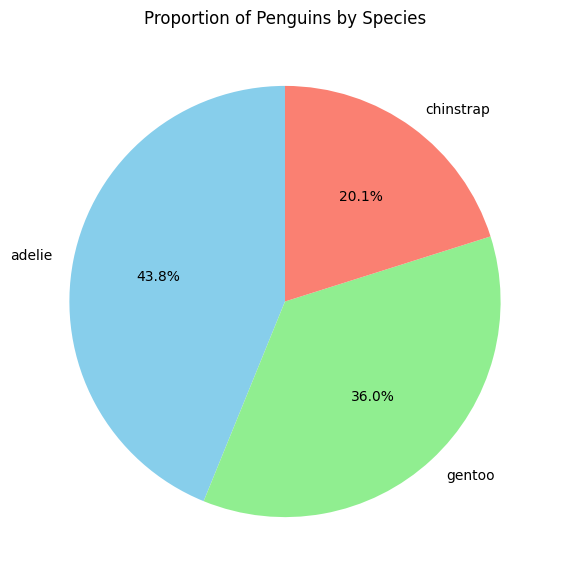

In [46]:


# Count of penguins by species
species_counts = df['species'].value_counts()

plt.figure(figsize=(7,7))
plt.pie(species_counts.values, labels=species_counts.index,
        autopct='%1.1f%%', startangle=90, colors=['skyblue','lightgreen','salmon'])
plt.title("Proportion of Penguins by Species")
plt.show()


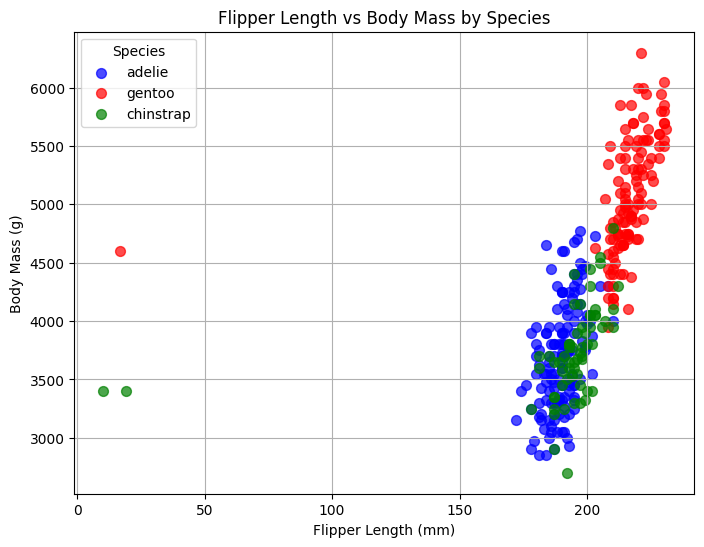

In [42]:
# Define colors for each species
colors = {'adelie':'blue', 'chinstrap':'green', 'gentoo':'red'}

plt.figure(figsize=(8,6))

for sp in df['species'].dropna().unique():
    subset = df[df['species'] == sp]
    plt.scatter(subset['flipper_length_mm'], subset['body_mass_g'],
                label=sp, color=colors[sp], s=50, alpha=0.7)

plt.title("Flipper Length vs Body Mass by Species")
plt.xlabel("Flipper Length (mm)")
plt.ylabel("Body Mass (g)")
plt.legend(title="Species")
plt.grid(True)
plt.show()

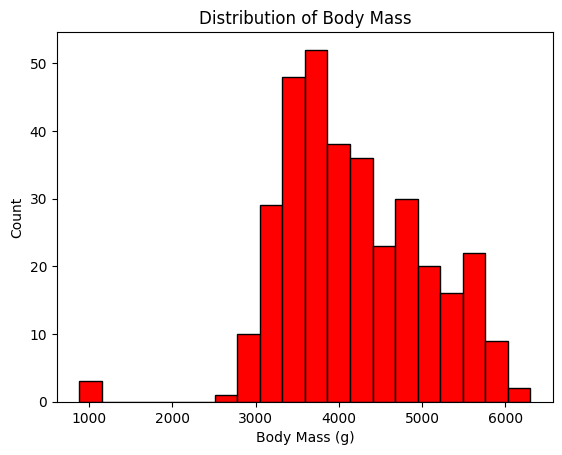

In [44]:
plt.figure()
plt.hist(df['body_mass_g'].dropna(), bins=20, color='red', edgecolor='black')
plt.title("Distribution of Body Mass")
plt.xlabel("Body Mass (g)")
plt.ylabel("Count")
plt.show()


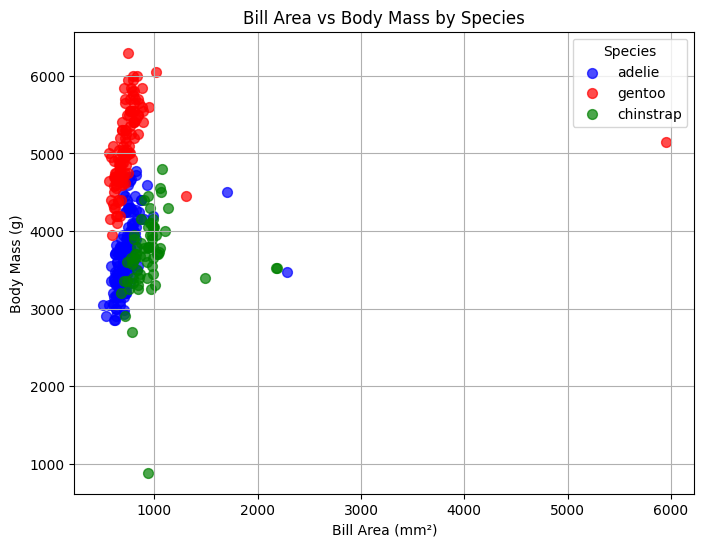

In [45]:

df['bill_area'] = df['bill_length_mm'] * df['bill_depth_mm']
colors = {'adelie':'blue', 'chinstrap':'green', 'gentoo':'red'}

plt.figure(figsize=(8,6))

for sp in df['species'].dropna().unique():
    subset = df[df['species'] == sp]
    plt.scatter(subset['bill_area'], subset['body_mass_g'],
                label=sp, color=colors[sp], s=50, alpha=0.7)

plt.title("Bill Area vs Body Mass by Species")
plt.xlabel("Bill Area (mm²)")
plt.ylabel("Body Mass (g)")
plt.legend(title="Species")
plt.grid(True)
plt.show()

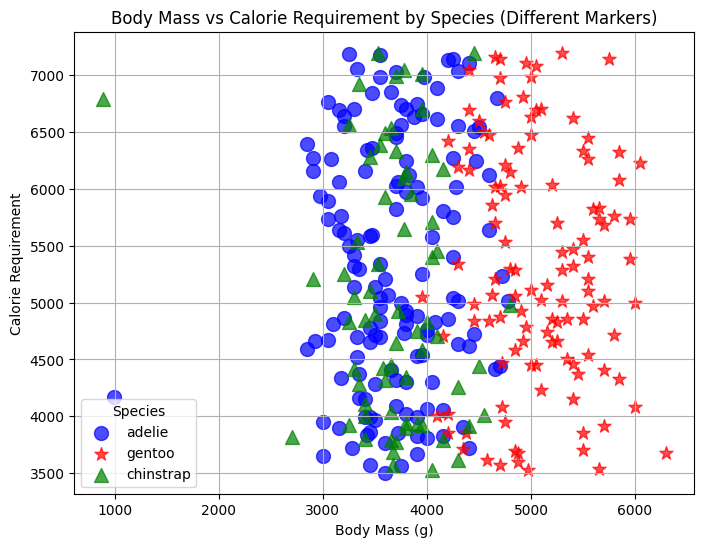

In [48]:


markers = {'adelie':'o',      # circle
           'chinstrap':'^',   # triangle up
           'gentoo':'*'}      # star

colors = {'adelie':'blue', 'chinstrap':'green', 'gentoo':'red'}

plt.figure(figsize=(8,6))

for sp in df['species'].dropna().unique():
    subset = df[df['species'] == sp]
    plt.scatter(subset['body_mass_g'], subset['calorie requirement'],
                label=sp, color=colors[sp], marker=markers[sp], s=100, alpha=0.7)

plt.title("Body Mass vs Calorie Requirement by Species")
plt.xlabel("Body Mass (g)")
plt.ylabel("Calorie Requirement")
plt.legend(title="Species")
plt.grid(True)
plt.show()

In [51]:
# 8 and 9

cleaned_df = cleaned_df.dropna(subset=['gender'])
cleaned_df['gender_binary'] = df['gender'].map({'female': 0, 'male': 1})

categorical_cols = cleaned_df.select_dtypes(include='object').columns.tolist()
categorical_cols = [col for col in categorical_cols if col != 'gender']

cleaned_df_encoded = pd.get_dummies(cleaned_df, columns=categorical_cols, drop_first=True)

numeric_features = cleaned_df_encoded.select_dtypes(include=['number']).columns.tolist()
correlations = cleaned_df_encoded[numeric_features].corr()['gender_binary'].sort_values(ascending=False)

print("Correlation of features with the target (gender):\n")
print(correlations)

# Identify weakly correlated features (absolute correlation < threshold)
threshold = 0.1
weak_features = correlations[abs(correlations) < threshold].index.tolist()
weak_features = [feat for feat in weak_features if feat != 'gender_binary']

print("\nFeatures with weak correlation (may consider dropping):")
print(weak_features)


updated_cleaned_df = cleaned_df_encoded.drop(columns=weak_features)


Correlation of features with the target (gender):

gender_binary             1.000000
body_mass_g               0.434607
flipper_length_mm         0.172514
bill_length_mm            0.130701
bill_depth_mm             0.100629
average sleep duration    0.064810
year                      0.002424
calorie requirement      -0.008478
Name: gender_binary, dtype: float64

Features with weak correlation (may consider dropping):
['average sleep duration', 'year', 'calorie requirement']


In [52]:
#10
# Select numeric features (exclude the binary target column if you want)
numeric_cols = updated_cleaned_df.select_dtypes(include=['number']).columns.tolist()
numeric_cols = [col for col in numeric_cols if col != 'gender_binary']  # keep target untouched

# Apply min-max normalization
for col in numeric_cols:
    col_min = updated_cleaned_df[col].min()
    col_max = updated_cleaned_df[col].max()
    updated_cleaned_df[col] = (updated_cleaned_df[col] - col_min) / (col_max - col_min)

print("Normalized numeric columns:\n")
print(updated_cleaned_df[numeric_cols].head())


Normalized numeric columns:

   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0        0.082772       0.049054           0.773756     0.527077
1        0.087501       0.037666           0.796380     0.536350
2        0.096961       0.042922           0.837104     0.434347
4        0.054393       0.054310           0.828054     0.471439
5        0.085137       0.065697           0.814480     0.508531
